## Analyse du PIB Mondial (2020-2025) by MilhaneAI

### Introduction
Ce notebook (qui est par ailleurs mon premier projet)
 a pour objectif d'analyser l'évolution du PIB des pays du monde sur la période 2020-2025.

### Objectifs du Projet
1.  **Data Cleaning** : Assurer l'intégrité et la cohérence des données du PIB en gérant les valeurs manquantes et en uniformisant les formats.
2.  **Identification des Économies Majeures** : Déterminer les pays avec les PIB les plus élevés.
3.  **Visualisation de l'Évolution du PIB** : Créer des représentations graphiques pour illustrer les trajectoires économiques de pays spécifiques, mettant en évidence la croissance et les variations sur la période étudiée.
4.  **Calcul de la Croissance du PIB** : Développer une fonction pour calculer le taux de croissance du PIB entre deux années données pour n'importe quel pays.

### Importation des librairies & lecture du dataset
Commençons d'abord par importer les librairies qui nous intéressent:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Désormais on load le dataset ( qui correpond à une base donnée avec les différents PIB des pays de 2020 à 2025). L'index est défini sur Country.

In [4]:
df = pd.read_csv("/content/2020-2025.csv", index_col="Country")

###Data Cleaning
On peut passer au data cleaning. Dans un premier temps on va uniformiser les noms de pays en supprimant les espaces.

In [5]:
df.index = df.index.str.strip()

Egalement on peut se demander si il manque des valeurs pour certaines années. Pour cela on peut faire un test rapide:

In [ ]:
df.isnull().sum()

,0
2020,0
2021,2
2022,2
2023,2
2024,4
2025,7


Il est possible d'avoir le détail (la localisation précise des valeurs nulles). Avec la commande suivante, on a tous les pays avec au moins une valeur manquante:

In [ ]:
df[df.isnull().any(axis=1)]

,2020,2021,2022,2023,2024,2025
Country,,,,,,
Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
Eritrea,1982,NaN,NaN,NaN,NaN,NaN
Lebanon,24976,19782.0,24748.0,23607.0,28280.0,NaN
Pakistan,300410,348481.0,374850.0,337754.0,373078.0,NaN
Sri Lanka,84304,88609.0,74584.0,83723.0,98964.0,NaN
Syria,60043,NaN,NaN,NaN,NaN,NaN
Palestine,15532,18109.0,19166.0,17848.0,NaN,NaN


Concernant ces fameuses valeurs, on a plusieurs possibilités. On peut simplement supprimer toute la ligne. Ou bien on essaye de trouver des valeurs assez cohérentes pour combler le vide. De nouveau, on a plusieurs outils. Soit on utilise la moyenne des valeurs, ce qui peut être une bonne idée pour les pays avec des croissances stables. Cependant pour les pays émergents avec une forte croissance du PIB, cela peut être un peu limité. Soit donc on peut interpoler, ce qui est plus adapté pour des données économiques et dynamiques.

In [6]:
df = df.interpolate(axis=1, method='linear')
df[df.isnull().any(axis=1)]

,2020,2021,2022,2023,2024,2025
Country,,,,,,


Pour terminer le data cleaning, on peut se demander si il n'y a pas de doublons. Le nombre de lignes devrait être égal au nombre de valeurs uniques dans la colonne de l'index (en comptant Country)

In [ ]:
print(df.index.shape)
df.index.nunique()

(196,)


196

### Les plus grosses économies ?
Passons à une analyse plus concrète du dataset. On peut par exemple se demander quels sont les 10 pays les plus riches (en terme de PIB) sur l'année 2025:

In [ ]:
df_classement_pib = df.sort_values(by='2025', ascending=False)
print(df_classement_pib.head(10))

                      2020        2021        2022        2023        2024  \
Country                                                                      
United States   21354125.0  23681175.0  26006900.0  27720725.0  29184900.0   
China           15103357.0  18190803.0  18307816.0  18270351.0  18748009.0   
Germany          3936989.0   4351188.0   4166872.0   4527009.0   4658526.0   
India            2674852.0   3167271.0   3346107.0   3638490.0   3909097.0   
Japan            5054069.0   5039148.0   4262146.0   4213167.0   4026211.0   
United Kingdom   2698705.0   3144079.0   3125404.0   3371118.0   3644636.0   
France           2645806.0   2968405.0   2797049.0   3056880.0   3162023.0   
Italy            1905956.0   2180656.0   2105722.0   2305271.0   2372059.0   
Canada           1655685.0   2022382.0   2190411.0   2173340.0   2241253.0   
Brazil           1476092.0   1670650.0   1951849.0   2191137.0   2171337.0   

                      2025  
Country                     
Unite

###Calcul de la croissance du PIB
Maintenant on veut créer une fonction qui pour un pays donné en input, va renvoyer l'évolution de son PIB de 2020 à 2025:

In [ ]:
def calculateur_pib(pays): # bien mettre le nom du pays entre guillemets
  return float(np.round((df.loc[pays,'2025'] - df.loc[pays,'2020']) / df.loc[pays,'2020'] * 100, 1)) # Le type float permet d'obtenir la valeur numérique brute sans le préfixe 'np.float'.
calculateur_pib('France')

21.4

###Modélisation graphique du PIB en fonction des années
Enfin on veut créer une fonction qui modélise l'évolution du PIB à travers un graphique pour un pays donné:

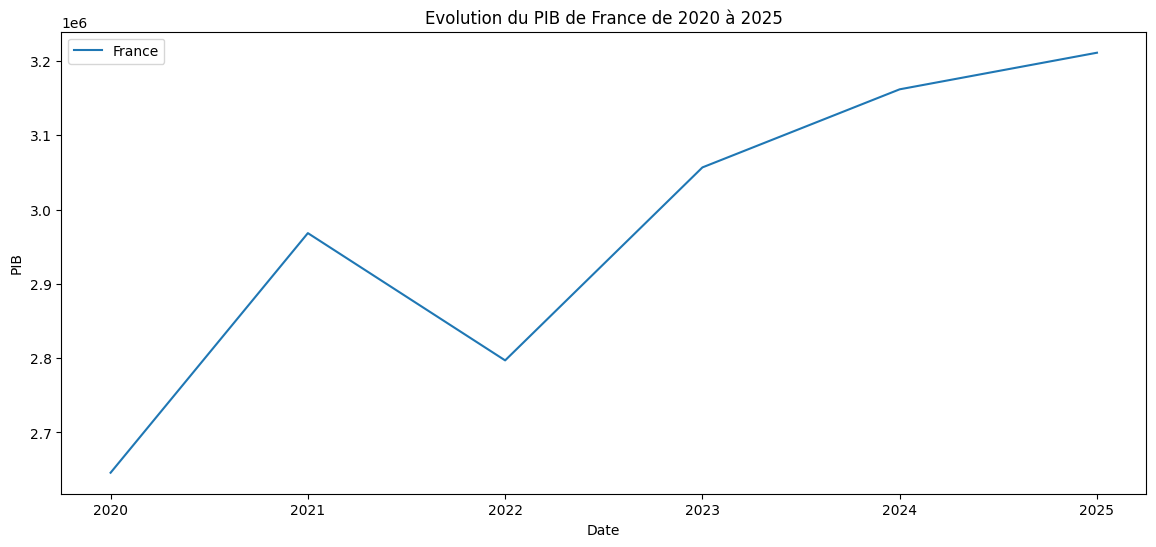

In [7]:
def graphique_pib(pays):# bien mettre le nom du pays entre guillemets
  plt.figure(figsize=(14,6))
  plt.title(f"Evolution du PIB de {pays} de 2020 à 2025")
  sns.lineplot(data=df.loc[pays], label=pays)
  plt.xlabel("Date")
  plt.ylabel("PIB")
  plt.show()
  return
graphique_pib('France')

## Conclusion
Voici donc mon premier projet dont le but était d'analyser des PIB mondiaux durant les cinq dernières années. Pour se faire, j'ai nettoyé le dataset (étant donné qu'il manquait des données). En plus de cela, j'ai selectionné les 10 plus grandes économies. Enfin j'ai crée deux fonctions qui servent respectivement à calculer le taux de croissance (entre 2020 et 2025) et modéliser graphiquement la progression du produit intérieur brut, pour un pays donné.
Par la suite je compte m'atteler à des projets plus ambitieux en poussant davantage la Data Vizualisation et essayant de tirer des prédictions à partir de données brutes.
